In [138]:
import numpy as np
import pandas as pd

In [139]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [140]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3859,ham,Yep. I do like the pink furniture tho.,NaN,NaN,NaN
5405,ham,So how many days since then?,NaN,NaN,NaN
4100,spam,GSOH? Good with SPAM the ladies?U could b a ma...,NaN,NaN,NaN
779,ham,That means get the door,NaN,NaN,NaN
5221,ham,"Jane babes not goin 2 wrk, feel ill after lst ...",NaN,NaN,NaN


In [141]:
df.shape

(5572, 5)

Data Cleaning

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [143]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [144]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [145]:
df.rename(columns={"v1":"target", "v2":"text"}, inplace=True)

In [146]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [147]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [148]:
df['target'] = encoder.fit_transform(df['target'])

In [149]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [150]:
# Check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [151]:
# Check for duplicate values
df.duplicated().sum()

403

In [152]:
df.drop_duplicates(keep='first', inplace=True)

In [153]:
df.duplicated().sum()

0

In [154]:
df.shape

(5169, 2)

Exploratory Data Analysis

In [155]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [156]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

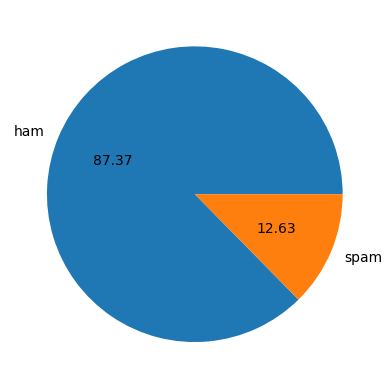

In [157]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [158]:
# Data is imbalanced

In [159]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Probal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [160]:
df['num_chars'] = df['text'].apply(len)

In [161]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [162]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [163]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [164]:
df['num_sents'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [165]:
df.head()

,target,text,num_chars,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [166]:
df[['num_chars', 'num_words', 'num_sents']].describe()

,num_chars,num_words,num_sents
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [167]:
df[df['target']==1][['num_chars', 'num_words', 'num_sents']].describe()

,num_chars,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [168]:
import seaborn as sns

<Axes: >

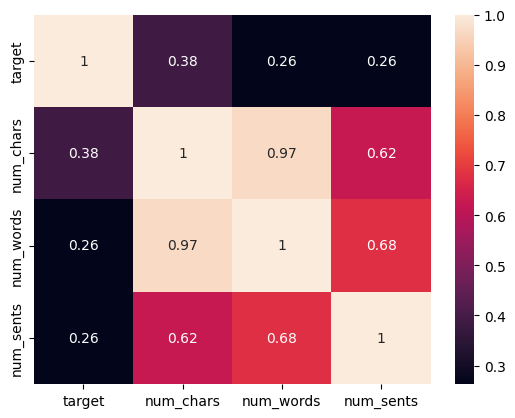

In [169]:
sns.heatmap(df[['target', 'num_chars', 'num_words', 'num_sents']].corr(), annot=True)

Data Preprocessing

In [170]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Probal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [171]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [212]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]

    for i in text:
        if i.isalnum():
            y.append(i)

    text = y.copy()
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y.copy()
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [213]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [214]:
df['transformed_text'] = df['text'].apply(transform_text)

In [215]:
df.head()

,target,text,num_chars,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [216]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [217]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

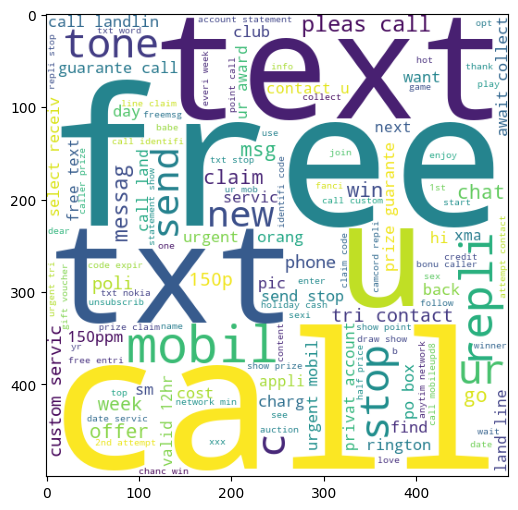

In [218]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [219]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

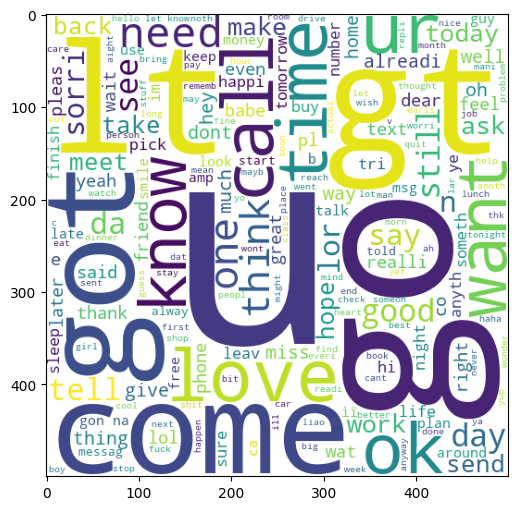

In [220]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [221]:
df.head()

,target,text,num_chars,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [224]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [225]:
len(spam_corpus)

9939

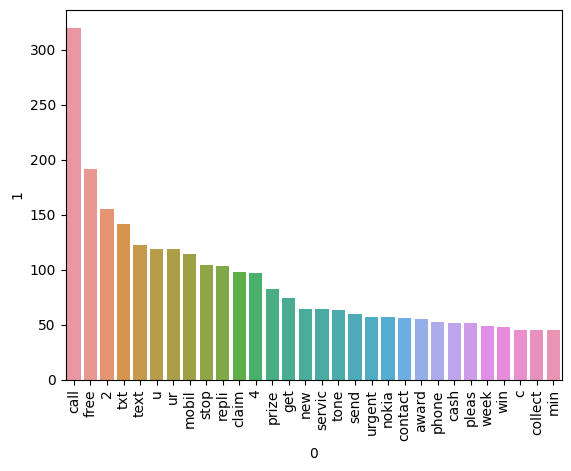

In [227]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [228]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [229]:
len(ham_corpus)

35404

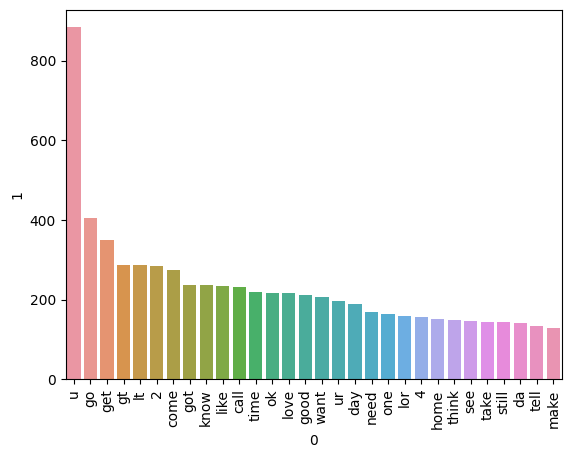

In [230]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [231]:
df.head()

,target,text,num_chars,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Model Building

In [270]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features=3000)
tfidf = TfidfVectorizer(max_features=3000)

In [271]:
x_t = tfidf.fit_transform(df['transformed_text']).toarray()
x_c = cv.fit_transform(df['transformed_text']).toarray()

In [272]:
print(x_t.shape, x_c.shape)

(5169, 3000) (5169, 3000)


In [273]:
y = df['target'].values

In [274]:
from sklearn.model_selection import train_test_split

In [275]:
xt_train, xt_test, yt_train, yt_test = train_test_split(x_t,y, test_size=0.2, random_state=2)
xc_train, xc_test, yc_train, yc_test = train_test_split(x_c,y, test_size=0.2, random_state=2)

In [276]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [277]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [278]:
# For CountVectorizer
gnb.fit(xc_train, yc_train)
pred_c = gnb.predict(xc_test)
print("Accuracy: ",accuracy_score(yc_test,pred_c))
print("Confusion Matrix:\n ", confusion_matrix(yc_test,pred_c))
print("Precision: ",precision_score(yc_test,pred_c))

Accuracy:  0.874274661508704
Confusion Matrix:
  [[787 109]
 [ 21 117]]
Precision:  0.5176991150442478


In [279]:
mnb.fit(xc_train, yc_train)
pred_c = mnb.predict(xc_test)
print("Accuracy: ",accuracy_score(yc_test,pred_c))
print("Confusion Matrix:\n ", confusion_matrix(yc_test,pred_c))
print("Precision: ",precision_score(yc_test,pred_c))

Accuracy:  0.971953578336557
Confusion Matrix:
  [[880  16]
 [ 13 125]]
Precision:  0.8865248226950354


In [280]:
bnb.fit(xc_train, yc_train)
pred_c = bnb.predict(xc_test)
print("Accuracy: ",accuracy_score(yc_test,pred_c))
print("Confusion Matrix:\n ", confusion_matrix(yc_test,pred_c))
print("Precision: ",precision_score(yc_test,pred_c))

Accuracy:  0.9835589941972921
Confusion Matrix:
  [[895   1]
 [ 16 122]]
Precision:  0.991869918699187


In [281]:
# For TfidfVectorizer
gnb.fit(xt_train, yt_train)
pred_t = gnb.predict(xt_test)
print("Accuracy: ",accuracy_score(yt_test,pred_t))
print("Confusion Matrix:\n ", confusion_matrix(yt_test,pred_t))
print("Precision: ",precision_score(yt_test,pred_t))

Accuracy:  0.8694390715667312
Confusion Matrix:
  [[788 108]
 [ 27 111]]
Precision:  0.5068493150684932


In [282]:
mnb.fit(xt_train, yt_train)
pred_t = mnb.predict(xt_test)
print("Accuracy: ",accuracy_score(yt_test,pred_t))
print("Confusion Matrix:\n ", confusion_matrix(yt_test,pred_t))
print("Precision: ",precision_score(yt_test,pred_t))

Accuracy:  0.9709864603481625
Confusion Matrix:
  [[896   0]
 [ 30 108]]
Precision:  1.0


In [283]:
bnb.fit(xt_train, yt_train)
pred_t = bnb.predict(xt_test)
print("Accuracy: ",accuracy_score(yt_test,pred_t))
print("Confusion Matrix:\n ", confusion_matrix(yt_test,pred_t))
print("Precision: ",precision_score(yt_test,pred_t))

Accuracy:  0.9835589941972921
Confusion Matrix:
  [[895   1]
 [ 16 122]]
Precision:  0.991869918699187


In [284]:
# Therefore TfidfVectorizer(max_features=3000) with MultinomialNB give the best precision

In [285]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl','wb'))
pickle.dump(mnb, open('mnb.pkl','wb'))